# Visualizing Amdahl's Law

In [1]:
import matplotlib.pyplot as plt

from collections import namedtuple 
from twelve.profile.amdahl import amdahls_law

In [2]:
Curve = namedtuple('Curve', ['curve', 'prop_parallel'])  

In [3]:
def plot_amdahl_curves(curves):
    """Plot Amdahl's law"""
    fig, ax = plt.subplots(figsize=(20, 10))
    
    for curve in curves:
        ax.semilogx(curve.curve, label=f"Parallel proportion: {curve.prop_parallel}")
    
    plt.legend(prop={'size': 14})
    x_ticks = get_xticks()
    _ = ax.set_xticklabels(x_ticks)
    _ = ax.set_ylabel("Speedup", fontsize=16)
    _ = ax.set_xlabel("Number of processors (P) in log scale", fontsize=16)
    _ = ax.set_title("Amdahl's Law", fontsize=18)

In [4]:
def get_xticks():
    x = 1
    ticks = [x]
    for i in range(1, 9):
        if i == 0:
            ticks.append(i)
        else:
            ticks.append(
                x*4
            )
        x *= 4
        
    return ticks

In [5]:
def create_curves():
    curve_75 = []
    curve_90 = []
    curve_95 = []
    for p in range(1, 65536):
        curve_75.append(
            amdahls_law(.75, p)
        )
        curve_90.append(
            amdahls_law(.90, p)
        )
        curve_95.append(
            amdahls_law(.95, p)
        )
    
    amdahl_75 = Curve(curve_75, 0.75)
    amdahl_90 = Curve(curve_90, 0.90)
    amdahl_95 = Curve(curve_95, 0.95)
    
    curves = [amdahl_75, amdahl_90, amdahl_95]
    
    return curves

In [6]:
curves = create_curves()

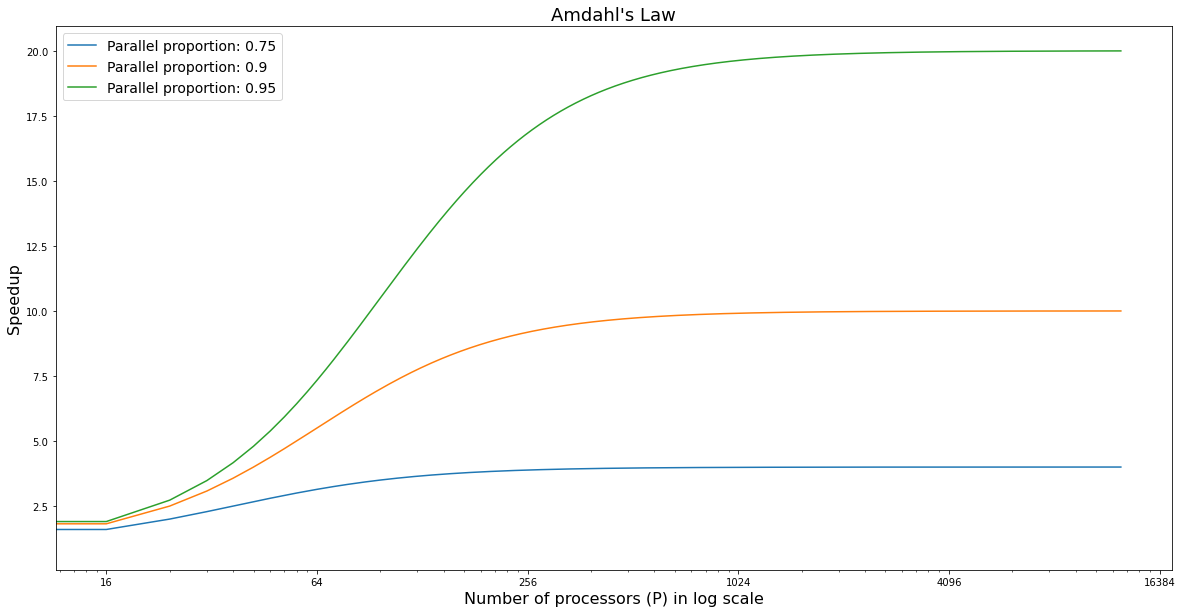

In [7]:
plot_amdahl_curves(curves)